In [14]:
import altair as alt
import polars as pl

alt.data_transformers.enable("vegafusion")
alt.renderers.enable("svg")

RendererRegistry.enable('svg')

## Ingest

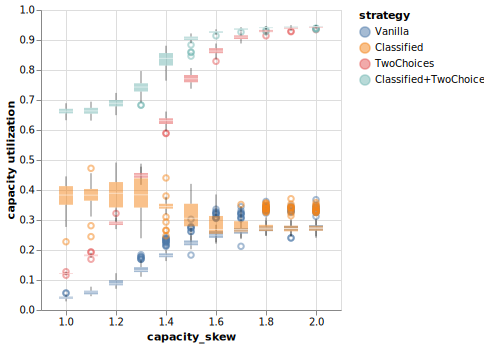

In [15]:
df = pl.read_csv(
    "ingest/*-sys.csv", schema_overrides={"capacity_skew": pl.Float32}
).with_columns(
    (pl.col("utilized_capacity") / pl.col("total_capacity")).alias(
        "capacity utilization"
    ),
    (pl.col("total_capacity") / pl.col("num_node")).alias("average node capacity"),
)
(
    alt.Chart(df)
    .mark_boxplot(opacity=0.5)
    .encode(
        alt.X("capacity_skew").scale(zero=False),
        alt.Y("capacity utilization"),
        alt.Color("strategy").sort(
            ["Vanilla", "Classified", "TwoChoices", "Classified+TwoChoices"]
        ),
    )
)

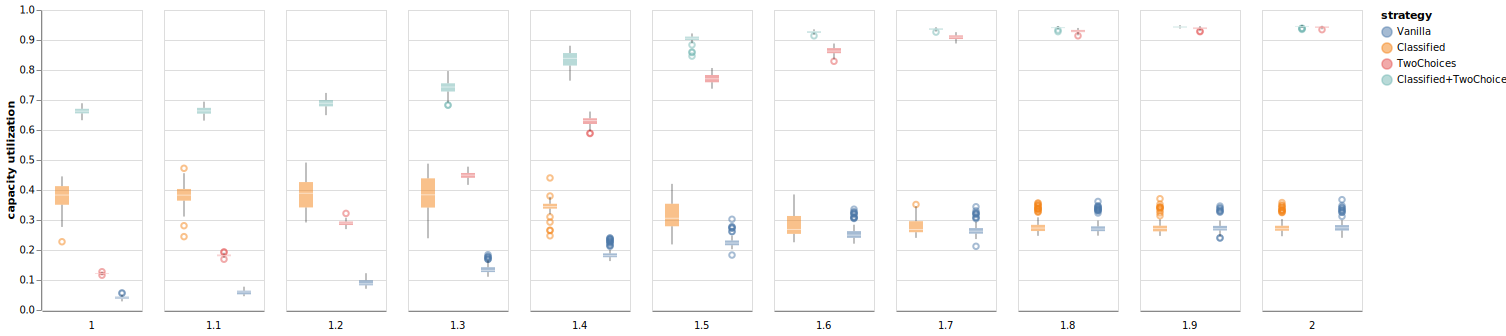

In [16]:
(
    alt.Chart(df)
    .mark_boxplot(opacity=0.5)
    .encode(
        alt.X("strategy").title(None).axis(labels=False, ticks=False).scale(padding=1),
        alt.Y("capacity utilization"),
        alt.Color("strategy").sort(
            ["Vanilla", "Classified", "TwoChoices", "Classified+TwoChoices"]
        ),
        alt.Column("capacity_skew").header(title=None, labelOrient="bottom"),
    )
)

In [17]:
df = pl.read_csv(
    "ingest/*-bin.csv", schema_overrides={"capacity_skew": pl.Float32}
).with_columns(
    (pl.col("bin_capacity") / pl.col("num_bin_node")).alias("bin average capacity"),
    (pl.col("bin_used_capacity") / pl.col("bin_capacity")).alias("bin utilization"),
    (pl.col("bin_hit_count") / pl.col("num_bin_node")).alias("bin average hit"),
    (pl.col("bin_hit_count") / pl.col("bin_capacity")).alias("bin capacity frequency"),
)
df

shape: (41_428, 16)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ num_node ┆ node_min_ ┆ node_max_ ┆ capacity_ ┆ … ┆ bin       ┆ bin utili ┆ bin       ┆ bin       │
│ ---      ┆ capacity  ┆ capacity  ┆ skew      ┆   ┆ average   ┆ zation    ┆ average   ┆ capacity  │
│ i64      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ capacity  ┆ ---       ┆ hit       ┆ frequency │
│          ┆ i64       ┆ i64       ┆ f32       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ ---       │
│          ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆ f64       ┆ f64       │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 12000    ┆ 1024      ┆ 102400    ┆ 1.0       ┆ … ┆ 1161.1896 ┆ 0.240968  ┆ 279.86914 ┆ 0.241019  │
│          ┆           ┆           ┆           ┆   ┆ 11        ┆           ┆ 1         ┆           │
│ 12000    ┆ 1024      ┆ 102400    ┆ 1.0       ┆ … ┆ 2908.9475 ┆ 0.093509  ┆ 272.01263 ┆ 0.093509  │
│          ┆           ┆           ┆           ┆   ┆ 22        ┆           ┆ 4         ┆           │
│ 12000    ┆ 1024      ┆ 102400    ┆ 1.0       ┆ … ┆ 5840.2976 ┆ 0.048311  ┆ 282.15348 ┆ 0.048311  │
│          ┆           ┆           ┆           ┆   ┆ 74        ┆           ┆ 8         ┆           │
│ 12000    ┆ 1024      ┆ 102400    ┆ 1.0       ┆ … ┆ 11815.286 ┆ 0.023673  ┆ 279.70696 ┆ 0.023673  │
│          ┆           ┆           ┆           ┆   ┆ 465       ┆           ┆ 5         ┆           │
│ 12000    ┆ 1024      ┆ 102400    ┆ 1.0       ┆ … ┆ 23559.291 ┆ 0.01173   ┆ 276.36139 ┆ 0.01173   │
│          ┆           ┆           ┆           ┆   ┆ 727       ┆           ┆ 3         ┆           │
│ …        ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 12000    ┆ 1024      ┆ 102400    ┆ 2.0       ┆ … ┆ 57703.0   ┆ 1.0       ┆ 58068.0   ┆ 1.006325  │
│ 12000    ┆ 1024      ┆ 102400    ┆ 2.0       ┆ … ┆ 1027.6286 ┆ 0.943117  ┆ 973.61579 ┆ 0.947439  │
│          ┆           ┆           ┆           ┆   ┆ 38        ┆           ┆ 5         ┆           │
│ 12000    ┆ 1024      ┆ 102400    ┆ 2.0       ┆ … ┆ 2722.0    ┆ 0.895151  ┆ 2452.0    ┆ 0.900808  │
│ 12000    ┆ 1024      ┆ 102400    ┆ 2.0       ┆ … ┆ 6112.0    ┆ 1.0       ┆ 6163.0    ┆ 1.008344  │
│ 12000    ┆ 1024      ┆ 102400    ┆ 2.0       ┆ … ┆ 11093.0   ┆ 0.942351  ┆ 10521.5   ┆ 0.948481  │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [18]:
base = (
    alt.Chart(df)
    .mark_bar()
    .encode(
        alt.X("bin_index").scale(zero=False),
    )
)
base.encode(alt.Y("bin utilization")) | base.encode(alt.Y("bin capacity frequency"))

## Frequency

### Storage frequency balance across classes

In [19]:
df = (
    pl.read_csv("freq/*-class.csv")
    .with_columns(
        (pl.col("class_hit_count") / pl.col("num_find") / pl.col("num_class_node")).alias(
            "class node frequency"
        ),
    )
    .with_columns(
        (pl.col("class node frequency") / pl.col("class_capacity")).alias("class storage frequency"),
    )
)
df

shape: (16, 12)
┌────────────┬──────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ strategy   ┆ num_node ┆ num_find ┆ find_size ┆ … ┆ class_cap ┆ class_hit ┆ class     ┆ class     │
│ ---        ┆ ---      ┆ ---      ┆ ---       ┆   ┆ acity     ┆ _count    ┆ node      ┆ storage   │
│ str        ┆ i64      ┆ i64      ┆ i64       ┆   ┆ ---       ┆ ---       ┆ frequency ┆ frequency │
│            ┆          ┆          ┆           ┆   ┆ i64       ┆ i64       ┆ ---       ┆ ---       │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆ f64       ┆ f64       │
╞════════════╪══════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Vanilla    ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 163804    ┆ 49181137  ┆ 0.0003    ┆ 1.8329e-9 │
│ Vanilla    ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 325018    ┆ 40557524  ┆ 0.000299  ┆ 9.2144e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 0         │
│ Vanilla    ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 657266    ┆ 37490232  ┆ 0.0003    ┆ 4.5719e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 0         │
│ Vanilla    ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 1302985   ┆ 35409148  ┆ 0.0003    ┆ 2.3004e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 0         │
│ Vanilla    ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 2622068   ┆ 34845516  ┆ 0.0003    ┆ 1.1438e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 0         │
│ …          ┆ …        ┆ …        ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ Classified ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 1306774   ┆ 9731118   ┆ 0.000082  ┆ 6.2860e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 1         │
│ Classified ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 2604535   ┆ 18924662  ┆ 0.000164  ┆ 6.2960e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 1         │
│ Classified ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 5222635   ┆ 37451145  ┆ 0.000328  ┆ 6.2757e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 1         │
│ Classified ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 10476397  ┆ 74920165  ┆ 0.000657  ┆ 6.2680e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 1         │
│ Classified ┆ 10000    ┆ 1000000  ┆ 3         ┆ … ┆ 20980204  ┆ 149420346 ┆ 0.001311  ┆ 6.2489e-1 │
│            ┆          ┆          ┆           ┆   ┆           ┆           ┆           ┆ 1         │
└────────────┴──────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

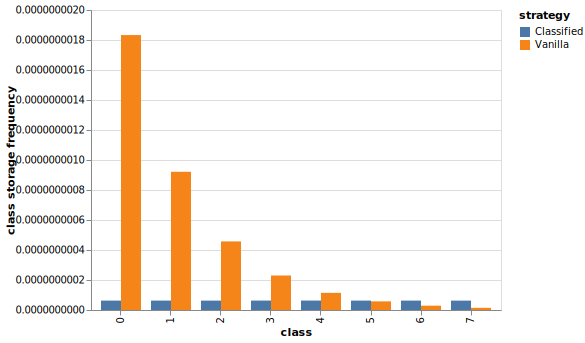

In [20]:
chart = alt.Chart(df).mark_bar().encode(
    alt.X("class:N"), alt.Y("class storage frequency"), alt.Color("strategy"), alt.XOffset("strategy")
)
chart

In [21]:
chart.save("graphs/freq-class.pdf")

### Node frequency CDF

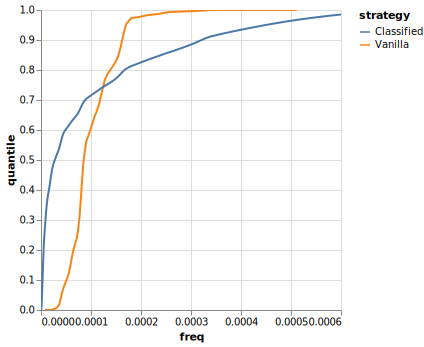

In [22]:
df = pl.read_csv("freq/*-node.csv")
df
chart = alt.Chart(df).mark_line(clip=True).encode(
    alt.X("freq").scale(domainMax=0.0006), alt.Y("quantile"), alt.Color("strategy")
)
chart

In [23]:
chart.save("graphs/freq-node.pdf")

### Capacity frequency CDF

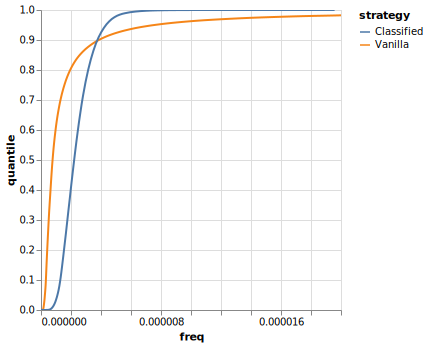

In [24]:
df = pl.read_csv("freq/*-capacity.csv")
df
chart = alt.Chart(df).mark_line(clip=True).encode(
    alt.X("freq").scale(domainMax=0.00002),
    alt.Y("quantile"),
    alt.Color("strategy"),
)
chart

In [25]:
chart.save("graphs/freq-capacity.pdf")